In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from mpl_toolkits import mplot3d


# Define physical constants
G = 1               # gravitational constant
c = 1               # speed of light
M = 1               # mass of the black hole
Rs = 2*G*M/c**2     # Schwarzschild radius of the black hole

In [16]:
def geodesic_eqn_kerr(y, t, M, a):
    r, theta, phi, t, rd, thetad, phid, td = y

    # Define constants
    rho = np.sqrt(r**2 + a**2 * np.cos(theta)**2)
    Delta = r**2 - 2*M*r + a**2

    rdd = - Delta / rho**4 * (
            -M*td**2 + 4*a*M*np.sin(theta)**2 * td * phid - phid*np.sin(theta)**2 * (
                r*rho**2 + a**2*M*np.sin(theta)**2
        )
    )

    thetadd = -phid / rho**4 * (
        4*a*M*r*td*np.sin(2*theta)-np.sin(theta)*np.cos(theta) * phid * (
        (a**2+r**2)*rho**2 + 4*a**2*M*r*np.sin(theta)**2
            )
        )

    phidd_numerator = 2*(-2*a*M*rho**2 *rd*td+(4*a*M*r*(2*M*r-rho**2)/np.tan(theta))*td*thetad
                         + (-2*M*r**2*rho**2+r*rho**4)*rd*phid + (-2*M*r**3*rho**2+a**2*rho**4+r**2*rho**4-2*a**2*M*r*rho**2*np.cos(theta))/np.tan(theta)*thetad*phid + rd*phid*(6*a**2*M**2*r*np.sin(theta)**2+a**2*M*rho**2*np.sin(theta)**2)+4*a**2*M**2*r**2*np.sin(2*theta)*thetad*phid)
    phidd_denominator = -2*M*r**3*rho**2+a**2*rho**4+r**2*rho**4-2*a**2*M*r*rho**2*np.cos(theta)**2+12*a**2*M**2*r**2*np.sin(theta)**2

    phidd = phidd_numerator / phidd_denominator

    tdd_numerator = rd*td*(a**2*M*rho**2+M*r**2*rho**2-6*a**2*M**2*r*np.sin(theta)**2) + rd*phid*(-2*a**3*M*rho**2*np.sin(theta)**2+2*a*M*r**2*rho**2*np.sin(theta)**2) + td*thetad*(-8*a**2*M**2*r**2*np.sin(2*theta)) + thetad*phid*(4*a**3*M**2*r**2*np.sin(theta)**2*np.sin(2*theta))

    tdd_denominator = -2*M*r**3*rho**2+a**2*rho**4+r**2*rho**4-2*a**2*M*r*rho**2*np.cos(theta)**2+12*a**2*M**2*r**2*np.sin(theta)**2

    tdd =tdd_numerator / tdd_denominator


    return [rd, thetad, phid, td, rdd, thetadd, phidd, tdd]

def geodesic_eqn_kerr2(tau, y, M, a, e, l):
    r, theta, phi, t, rd, thetad = y

    # Define constants
    rho = np.sqrt(r**2 + a**2 * np.cos(theta)**2)
    Delta = r**2 - 2*M*r + a**2

    fac1 = (1-2*M/r)
    fac2 = 2*M*a/r

    td = (1/Delta)*((r**2+a**2+fac2*a)*e - fac2*l)
    phid = (1/Delta)*(fac1*l + fac2*e)

    rdd = - Delta / rho**4 * (
            -M*td**2 + 4*a*M*np.sin(theta)**2 * td * phid - phid*np.sin(theta)**2 * (
            r*rho**2 + a**2*M*np.sin(theta)**2
    )
    )

    thetadd = -phid / rho**4 * (
            4*a*M*r*td*np.sin(2*theta)-np.sin(theta)*np.cos(theta) * phid * (
            (a**2+r**2)*rho**2 + 4*a**2*M*r*np.sin(theta)**2
        )
    )

    return [rd, thetad, phid, td, rdd, thetadd]











In [18]:
# # Define initial conditions
# a = 0.0*Rs
# r0 = 3*Rs                       # initial radius
# phi0 = 0.00                     # initial azimuthal angle
# theta0 = np.pi/2                # initial polar angle
# v_r0 = 0                     # initial radial velocity
# v_theta0 = 0
#
# e = 1
# l = 0
#
# # Define time span and initial state vector
# N = 10000
# T = 100
# t0 = 0
# t = np.linspace(t0, T, N)
# dt = T/N
# y0 = [r0, theta0, phi0, t0, v_r0 * dt, v_theta0 * dt]
#
# # Solve geodesic equation using odeint
# y = solve_ivp(geodesic_eqn_kerr2, t, y0, args=(M, a, e, l))
#
# # Extract positions and plot orbit
# x0 = y[:, 0]*np.sin(y[:, 1])*np.cos(y[:, 2])
# y0 = y[:, 0]*np.sin(y[:, 1])*np.sin(y[:, 2])
# z0 = y[:, 0]*np.cos(y[:, 1])
#
# # x0 = y[0, :]*np.sin(y[1, :])*np.cos(y[2, :])
# # y0 = y[0, :]*np.sin(y[1, :])*np.sin(y[2, :])
# # z0 = y[0, :]*np.cos(y[1, :])
#
#
# from mpl_toolkits import mplot3d
# fig = plt.figure()
# ax = plt.axes(projection='3d')
#
# ax.plot3D(x0[:3_000], y0[:3_000], z0[:3_000])
# ax.scatter3D(0, 0, 0, c='r', s=100)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
#
#
# plt.title('Orbit of a particle in Kerr spacetime')
# plt.show()

ValueError: too many values to unpack (expected 2)

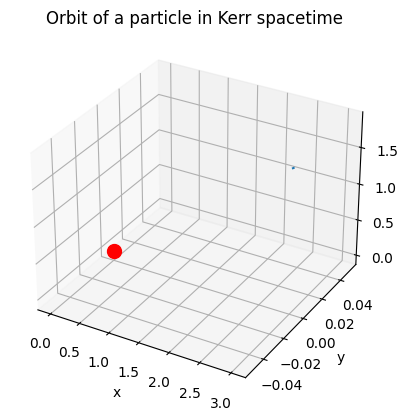

In [142]:
a = 0.0*Rs
r0 = 3*Rs                      # initial radius
M = 0
phi0 = 0.00                     # initial azimuthal angle
theta0 = np.pi/2                # initial polar angle
v_r0 = 0.01                     # initial radial velocity
v_theta0 = 0.01
e = 1
l = 0.0

v_theta0 = 0

# Define time span and initial state vector
N = 1000000
T = 1000
t0 = 0
t = np.linspace(t0, T, N)
dt = T/N
y_init = [r0, theta0, phi0, t0, v_r0 * dt, v_theta0 * dt]


y = solve_ivp(geodesic_eqn_kerr2, [t0, T], y_init, args=(M, a, e, l))

# Extract positions and plot orbit
x0 = y.y[0]*np.sin(y.y[1])*np.cos(y.y[2])
y0 = y.y[0]*np.sin(y.y[1])*np.sin(y.y[2])
z0 = y.y[0]*np.cos(y.y[1])

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(x0, y0, z0)
ax.scatter3D(0, 0, 0, c='r', s=100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.title('Orbit of a particle in Kerr spacetime')
plt.show()

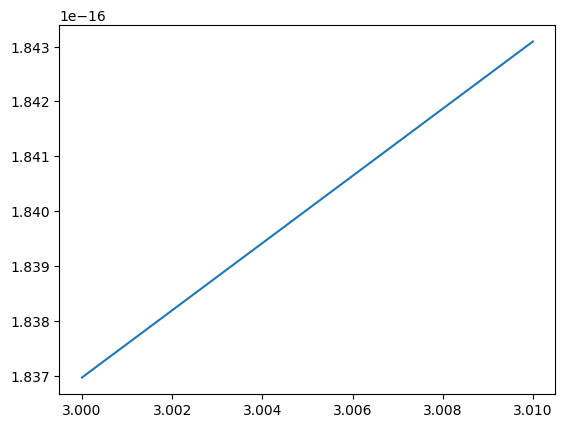

In [143]:
plt.plot(x0,z0)

C:\Users\jmonc\AppData\Local\Temp\ipykernel_5284\1868885499.py:22: RuntimeWarning: invalid value encountered in multiply
  x0 = y[:, 0]*np.sin(y[:, 1])*np.cos(y[:, 2])
C:\Users\jmonc\AppData\Local\Temp\ipykernel_5284\1868885499.py:23: RuntimeWarning: invalid value encountered in multiply
  y0 = y[:, 0]*np.sin(y[:, 1])*np.sin(y[:, 2])
C:\Users\jmonc\AppData\Local\Temp\ipykernel_5284\1868885499.py:24: RuntimeWarning: invalid value encountered in multiply
  z0 = y[:, 0]*np.cos(y[:, 1])


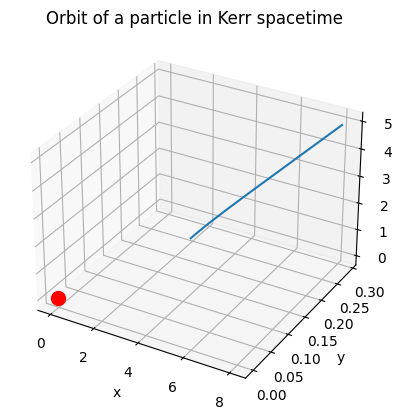

In [53]:
# # Define initial conditions
# a = 0.0*Rs
# r0 = 3*Rs                       # initial radius
# phi0 = 0.00                     # initial azimuthal angle
# theta0 = np.pi/2                # initial polar angle
# v_r0 = 0.00                     # initial radial velocity
# v_phi0 = 2*np.sqrt(3)*G*M/r0**2 # initial azimuthal velocity
# v_theta0 = 0
#
# # Define time span and initial state vector
# N = 10000
# T = 100
# t0 = 0
# t = np.linspace(t0, T, N)
# dt = T/N
# y0 = [r0, theta0, phi0, t0, v_r0 * dt, v_theta0 * dt, v_phi0 * dt, dt]
#
# # Solve geodesic equation using odeint
# y = odeint(geodesic_eqn_kerr, y0, t, args=(M, a))
#
# # Extract positions and plot orbit
# x0 = y[:, 0]*np.sin(y[:, 1])*np.cos(y[:, 2])
# y0 = y[:, 0]*np.sin(y[:, 1])*np.sin(y[:, 2])
# z0 = y[:, 0]*np.cos(y[:, 1])
#
# # x0 = y[0, :]*np.sin(y[1, :])*np.cos(y[2, :])
# # y0 = y[0, :]*np.sin(y[1, :])*np.sin(y[2, :])
# # z0 = y[0, :]*np.cos(y[1, :])
#
#
# from mpl_toolkits import mplot3d
# fig = plt.figure()
# ax = plt.axes(projection='3d')
#
# ax.plot3D(x0[:3_000], y0[:3_000], z0[:3_000])
# ax.scatter3D(0, 0, 0, c='r', s=100)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
#
#
# plt.title('Orbit of a particle in Kerr spacetime')
# plt.show()

In [34]:
y[:,0]

array([6.        , 6.00000019, 6.00000077, ...,        nan,        nan,
              nan])

In [55]:
x0[2000:3000]

array([6.83206095, 6.8329622 , 6.83386405, 6.8347665 , 6.83566956,
       6.83657321, 6.83747747, 6.83838234, 6.8392878 , 6.84019387,
       6.84110055, 6.84200783, 6.84291571, 6.8438242 , 6.84473329,
       6.84564299, 6.84655329, 6.8474642 , 6.84837571, 6.84928783,
       6.85020056, 6.8511139 , 6.85202784, 6.85294239, 6.85385755,
       6.85477331, 6.85568969, 6.85660667, 6.85752426, 6.85844246,
       6.85936127, 6.86028069, 6.86120072, 6.86212136, 6.86304261,
       6.86396447, 6.86488694, 6.86581002, 6.86673372, 6.86765802,
       6.86858294, 6.86950847, 6.87043462, 6.87136137, 6.87228875,
       6.87321673, 6.87414533, 6.87507454, 6.87600437, 6.87693481,
       6.87786586, 6.87879753, 6.87972982, 6.88066272, 6.88159624,
       6.88253038, 6.88346513, 6.8844005 , 6.88533648, 6.88627309,
       6.88721031, 6.88814815, 6.88908661, 6.89002568, 6.89096538,
       6.8919057 , 6.89284663, 6.89378818, 6.89473036, 6.89567315,
       6.89661657, 6.89756061, 6.89850526, 6.89945054, 6.90039

In [50]:
y0[:1000]

array([0.00000000e+00, 5.77408051e-05, 1.15481629e-04, 1.73222489e-04,
       2.30963405e-04, 2.88704392e-04, 3.46445471e-04, 4.04186659e-04,
       4.61927976e-04, 5.19669441e-04, 5.77411072e-04, 6.35152888e-04,
       6.92894909e-04, 7.50637152e-04, 8.08379638e-04, 8.66122385e-04,
       9.23865412e-04, 9.81608735e-04, 1.03935237e-03, 1.09709635e-03,
       1.15484067e-03, 1.21258537e-03, 1.27033045e-03, 1.32807594e-03,
       1.38582186e-03, 1.44356822e-03, 1.50131505e-03, 1.55906236e-03,
       1.61681016e-03, 1.67455849e-03, 1.73230735e-03, 1.79005677e-03,
       1.84780677e-03, 1.90555736e-03, 1.96330855e-03, 2.02106038e-03,
       2.07881286e-03, 2.13656600e-03, 2.19431983e-03, 2.25207437e-03,
       2.30982963e-03, 2.36758562e-03, 2.42534238e-03, 2.48309992e-03,
       2.54085825e-03, 2.59861740e-03, 2.65637738e-03, 2.71413822e-03,
       2.77189992e-03, 2.82966252e-03, 2.88742602e-03, 2.94519045e-03,
       3.00295583e-03, 3.06072217e-03, 3.11848949e-03, 3.17625781e-03,
      

In [37]:
z0

array([3.67394040e-16, 3.67394052e-16, 3.67394087e-16, ...,
                  nan,            nan,            nan])

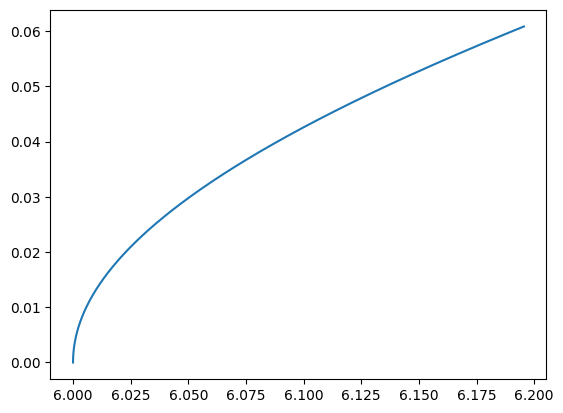

In [56]:
plt.plot(x0[:1000], y0[:1000])

array([6.        , 6.00000019, 6.00000077, ...,        nan,        nan,
              nan])

In [60]:
ax.plot3D(x0[:100],y0[:100], z0[:100])
plt.show()

In [149]:
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
#import pandas as pd
from scipy.integrate import odeint

a,b,T,R = 1.0,5.0,100.0,23.0
tau = np.linspace(0,10.0,100000)

def Delta(r): return a**2+r**2-r*b

def pp(r): return (1-b/r)*R-a*b*T/r
def tt(r): return -(r**2+a**2+a*a*b/r)*T-a*b*R/r

def rDotSq(r): return -(Delta(r)+T*tt(r)+R*pp(r))

def rDdot(r): return -(1/(2*r))*(rDotSq(r)+(1/r)*(2*r*(1-T**2)-b+(b*(a*T+R)**2)/(r**2)))

def computeDerivatives(y,tau):
    r = y[2]
    D = Delta(r)
    return np.array([tt(r)/D,pp(r)/D,y[3],rDdot(r)])

r0 = 80.0
D0 = Delta(r0)
y0 = np.array([tt(r0)/D0,pp(r0)/D0,r0,0.0])

sol = odeint(computeDerivatives, y0, tau)

s = np.sqrt(sol[:,2]**2+a**2)
x = s*np.sin(sol[:,1])
y = s*np.cos(sol[:,1])

data = [
    go.Scatter(
        x=x,
        y=y,
        mode="lines",
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
]

layout = go.Layout(
    title='T={},R={},a={},b={},r={},u={}'.format(T,R,a,b,r0,y0[-1]),
    showlegend = False,
    yaxis=dict(scaleanchor="x", scaleratio=1)
)

fig = go.Figure(data=data, layout=layout)
py.plot(fig, filename = 'plot')#, image="svg")

C:\Users\jmonc\hon_code\venv\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



'plot.html'

In [145]:
!pip install plotly

^C


# Expoit the constants of motion

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from mpl_toolkits.mplot3d import Axes3D

In [13]:
Delta = lambda r, M, a: r**2 - 2*M*r + a**2
Sigma = lambda r, theta, a: r**2 + a**2*np.cos(theta)**2
Kappa = lambda Q, L, a, E, M: (Q**2 + L**2 + a**2*(E**2+M))

def kerr_EOM(y, t, M, a, L, E, Q, mu):
    r, theta, phi, t, p_r, p_theta = y

    sigma = Sigma(r, theta, a)
    delta = Delta(r, M, a)
    kappa = Kappa(Q, L, a, E, M)

    rd = (delta/sigma)*p_r
    thetad  = p_theta/sigma
    phid = (2*a*r*E+(sigma-2*r)*L/np.sin(theta)**2)/(sigma*delta)
    td = E + (2*r*(r**2+a**2)*E-2*a*r*L)/(sigma*delta)

    p_rd = (1/sigma*delta)*(((r**2+a**2)*mu-kappa)*(r-1)+r*delta*mu+2*r*(r**2+a**2)*E**2-2*a*E*L) - 2*p_r**2*(r-1)/sigma
    p_thetad = (np.sin(theta)*np.cos(theta)/sigma)*(L**2/np.sin(theta)**4-a**2*(E**2+M))

    return np.array([rd, thetad, phid, td, p_rd, p_thetad])

# Initial conditions
r0 = 7
theta0 = np.pi/2
phi0 = 0
tau0 = 0
p_r0 = 0
p_theta0 = 2

# Constants of motion
M = 1
a = 0.9
L = 2.37
E = 0.93
Q = 3.82
mu = -1

y0 = np.array([r0, theta0, phi0, tau0, p_r0, p_theta0])

# Time
t_span = [0, 1000]

# Solve ODE
y = solve_ivp(kerr_EOM, t_span, y0, args=(M, a, L, E, Q, mu), full_output=1)


C:\Users\jmonc\hon_code\venv\lib\site-packages\scipy\integrate\_ivp\common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `full_output`.
  warn("The following arguments have no effect for a chosen solver: {}."


TypeError: cannot unpack non-iterable float object

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from mpl_toolkits.mplot3d import Axes3D

""""
Constants of motion:
    L = angular momentum
    E = energy
    Q = Carter's constant https://en.wikipedia.org/wiki/Carter_constant
    mu = mass of the particle
"""

Delta = lambda r, M, a: r**2 - 2*M*r + a**2
Sigma = lambda r, theta, a: r**2 + a**2*np.cos(theta)**2
Kappa = lambda Q, L, a, E, M: (Q**2 + L**2 + a**2*(E**2+M))

def kerr_EOM(t, y, M, a, L, E, Q, mu):
    """"Equations of motion for particle in Kerr orbit"""

    r, theta, phi, t_prime, p_r, p_theta = y
    # t_prime = 1

    sigma = Sigma(r, theta, a)
    delta = Delta(r, M, a)
    kappa = Kappa(Q, L, a, E, M)
    factor = 1 / (sigma * delta)

    rd = (delta/sigma) * p_r
    thetad = p_theta/sigma
    phid = (2*a*r*E + (sigma - 2*r)*L/np.sin(theta)**2) * factor
    t_prime_d = E + (2*r*(r**2+a**2)*E - 2*a*r*L) * factor
    # t_prime_d = 0
    p_rd = factor * (((r**2 + a**2)*mu - kappa) * (r - 1) + r*delta*mu + 2*r*(r**2 + a**2)*E**2 - 2*a*E*L) - 2*p_r**2*(r - 1)/sigma
    p_thetad = np.sin(theta)*np.cos(theta)/sigma * (L**2/np.sin(theta)**4 - a**2*(E**2 + mu))

    return [rd, thetad, phid, t_prime_d, p_rd, p_thetad]


# Initial conditions
r0 = 7.0
theta0 = 1.5707963267948966
phi0 = 0.0
t_prime_0 = 0.0
p_r0 = 0.0
p_theta0 = 1.9558

# Constants of motion
M = 1.0
a = 0.9
L = 2.37176
E = 0.935179
Q = 3.82514
mu = -1.0
params = (M, a, L, E, Q, mu)

y0 = [r0, theta0, phi0, t_prime_0, p_r0, p_theta0]

# Time
T = 50
dt = 1e-3
t_span = [0.0, T]
t = np.arange(0.0, T, 1e-3)

# Solve ODE
sol = solve_ivp(kerr_EOM, t_span, y0, args=params, method='Radau', full_output=1, t_eval=t, rtol=1e-9, atol=1e-9)

# sol2 = solve_ivp(kerr_EOM, t_span, y0, args=params, method='DOP853', full_output=1)
# sol3 = solve_ivp(kerr_EOM, t_span, y0, args=params, method='Radau', full_output=1)
# sol4 = solve_ivp(kerr_EOM, t_span, y0, args=params, method='RK45', full_output=1)
# sol5 = solve_ivp(kerr_EOM, t_span, y0, args=params, method='RK23', full_output=1)

# Extract solution
r = sol.y[0]
theta = sol.y[1]
phi = sol.y[2]

# Convert from polar to cartesian coordinates
x, y, z = r*np.sin(theta)*np.cos(phi), r*np.sin(theta)*np.sin(phi), r*np.cos(theta)

# Plot the particle's orbit

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)                                # Plot the orbit
# ax.plot(sol2.y[0]*np.sin(sol2.y[1])*np.cos(sol2.y[2]), sol2.y[0]*np.sin(sol2.y[1])*np.sin(sol2.y[2]), sol2.y[0]*np.cos(sol2.y[1]))

# Plot black hole event horizon surface
Reh = M + np.sqrt(M**2 - a**2)
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
xb = Reh * np.cos(u)*np.sin(v)
yb = Reh * np.sin(u)*np.sin(v)
zb = Reh * np.cos(v)
ax.plot_wireframe(xb, yb, zb, color="r")

# Plot black hole spin surface
Rs = M + np.sqrt(M**2 - a**2 * np.cos(theta))
xe = Rs * np.cos(u)*np.sin(v)
ye = Rs * np.sin(u)*np.sin(v)
ze = Rs * np.cos(v)
ax.plot_wireframe(xb, yb, zb, color="g")

# Label axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Kerr orbit")
plt.show()

In [129]:
%matplotlob notebook